In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


## Load the Data

In [29]:
df= pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-11-08,31.010000,31.879999,30.940001,31.309999,31.309999,1274000
1,2012-11-09,30.600000,30.930000,29.850000,30.320000,30.320000,863000
2,2012-11-12,30.290001,31.420000,30.160000,31.070000,31.070000,555900
3,2012-11-13,31.290001,32.000000,30.719999,31.610001,31.610001,998300
4,2012-11-14,31.959999,32.119999,31.200001,31.379999,31.379999,871300


In [30]:
df.shape

(903, 7)

## Visualize the closing price data

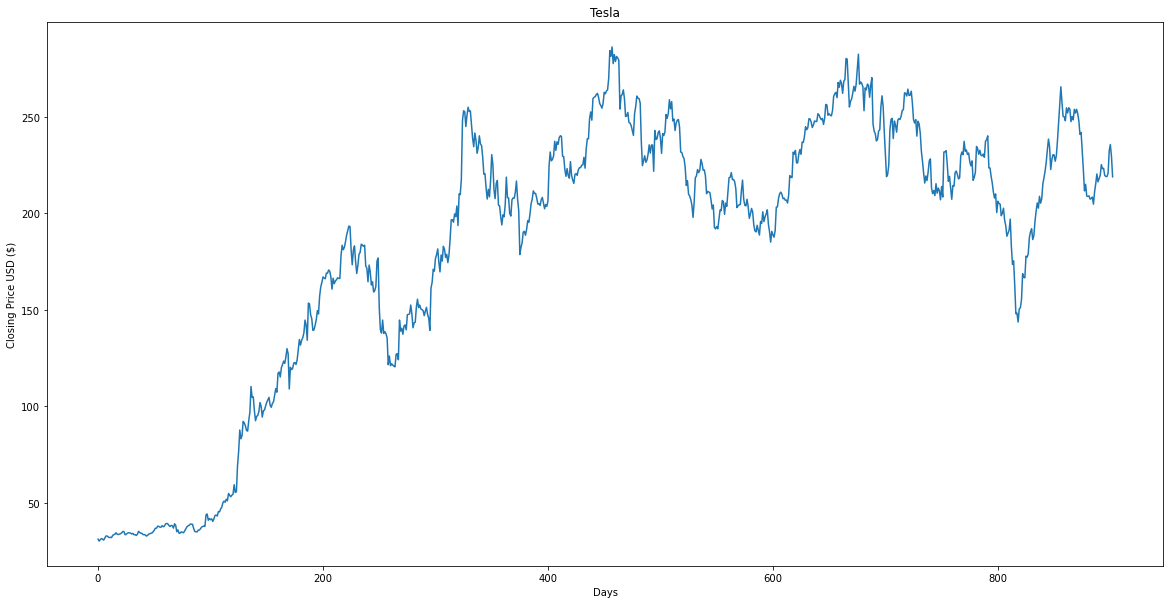

In [31]:
plt.figure(figsize=(20,10))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [32]:
df=df[['Close']]
df.tail()

,Close
898,220.679993
899,232.339996
900,235.520004
901,229.360001
902,218.789993


## Now predict 'x' days out into the future

In [33]:
futureDays=50
df['Prediction'] = df[['Close']].shift(-futureDays)
df.tail()

,Close,Prediction
898,220.679993,NaN
899,232.339996,NaN
900,235.520004,NaN
901,229.360001,NaN
902,218.789993,NaN


In [35]:
X= np.array(df.drop(['Prediction'],1))[:-futureDays]
print(X)
len(X)


[[ 31.309999]
 [ 30.32    ]
 [ 31.07    ]
 [ 31.610001]
 [ 31.379999]
 [ 30.82    ]
 [ 31.84    ]
 [ 32.919998]
 [ 33.      ]
 [ 32.470001]
 [ 32.130001]
 [ 32.27    ]
 [ 32.150002]
 [ 33.23    ]
 [ 33.689999]
 [ 33.82    ]
 [ 34.619999]
 [ 33.900002]
 [ 33.709999]
 [ 33.900002]
 [ 34.169998]
 [ 34.57    ]
 [ 35.279999]
 [ 35.259998]
 [ 33.610001]
 [ 33.810001]
 [ 34.400002]
 [ 34.59    ]
 [ 34.610001]
 [ 34.43    ]
 [ 34.      ]
 [ 34.279999]
 [ 33.59    ]
 [ 33.689999]
 [ 33.220001]
 [ 33.869999]
 [ 35.360001]
 [ 34.77    ]
 [ 34.400002]
 [ 34.34    ]
 [ 33.68    ]
 [ 33.639999]
 [ 33.529999]
 [ 32.91    ]
 [ 33.259998]
 [ 33.900002]
 [ 34.099998]
 [ 34.380001]
 [ 34.52    ]
 [ 35.189999]
 [ 36.      ]
 [ 36.990002]
 [ 36.98    ]
 [ 38.029999]
 [ 37.950001]
 [ 37.52    ]
 [ 37.509998]
 [ 38.299999]
 [ 37.740002]
 [ 38.130001]
 [ 39.169998]
 [ 39.48    ]
 [ 39.240002]
 [ 38.419998]
 [ 37.889999]
 [ 38.450001]
 [ 38.27    ]
 [ 37.040001]
 [ 39.279999]
 [ 38.540001]
 [ 35.16    ]
 [ 36.

C:\Users\SHRIPADA\AppData\Local\Temp/ipykernel_6948/2553227358.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X= np.array(df.drop(['Prediction'],1))[:-futureDays]


853

## Create the target data set (y) and convert it to a numpy array

In [17]:
y= np.array(df['Prediction'])[:-futureDays]
print(y)
len(y)

[ 36.        36.990002  36.98      38.029999  37.950001  37.52
  37.509998  38.299999  37.740002  38.130001  39.169998  39.48
  39.240002  38.419998  37.889999  38.450001  38.27      37.040001
  39.279999  38.540001  35.16      36.110001  34.380001  34.43
  35.099998  34.830002  34.650002  35.580002  36.650002  37.689999
  38.23      38.470001  39.099998  39.119999  38.98      36.849998
  35.290001  35.150002  35.080002  35.950001  36.009998  36.619999
  37.529999  37.860001  38.16      37.889999  43.93      44.34
  41.099998  42.009998  41.369999  41.830002  40.5       41.860001
  43.59      43.75      43.299999  45.59      45.450001  46.970001
  47.830002  50.189999  51.009998  50.43      52.        51.200001
  54.939999  53.990002  53.279999  54.110001  54.549999  59.5
  55.509998  55.790001  69.400002  76.760002  87.800003  83.239998
  84.839996  92.25      91.5       89.940002  87.589996  87.239998
  92.730003  97.080002 110.330002 104.629997 104.949997  97.760002
  92.589996  94.

853

## Split the data into 75% training and 25% testing

In [18]:
x_train, x_test, y_train, y_test= train_test_split (X,y, test_size=0.25)

## Models

Decision Tree Regressor Model

In [19]:
tree= DecisionTreeRegressor().fit(x_train, y_train)

Linear Regressor Model

In [20]:
lr= LinearRegression().fit(x_train, y_train)

In [37]:
xFuture= df.drop(['Prediction'],1)[:-futureDays]
xFuture= xFuture.tail(futureDays)
xFuture= np.array(xFuture)
xFuture


C:\Users\SHRIPADA\AppData\Local\Temp/ipykernel_6948/914552649.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  xFuture= df.drop(['Prediction'],1)[:-futureDays]


array([[198.699997],
       [199.970001],
       [202.550003],
       [196.380005],
       [193.559998],
       [188.070007],
       [189.699997],
       [191.199997],
       [196.940002],
       [182.779999],
       [173.479996],
       [175.330002],
       [162.600006],
       [147.990005],
       [148.25    ],
       [143.669998],
       [150.470001],
       [151.039993],
       [155.169998],
       [168.679993],
       [166.770004],
       [166.580002],
       [177.740005],
       [177.210007],
       [179.      ],
       [187.429993],
       [190.339996],
       [191.929993],
       [186.350006],
       [188.339996],
       [195.740005],
       [201.039993],
       [205.289993],
       [202.600006],
       [208.720001],
       [205.179993],
       [207.5     ],
       [215.149994],
       [218.339996],
       [221.929993],
       [226.380005],
       [232.740005],
       [238.320007],
       [234.240005],
       [222.580002],
       [227.75    ],
       [230.259995],
       [230.1

In [38]:
treePrediction = tree.predict(xFuture)
print(treePrediction)
lrPrediction= lr.predict(xFuture)
lrPrediction

[223.059998  219.070007  255.470001  265.420013  257.200012  250.070007
 223.539993  247.729996  254.529999  251.860001  149.360001  253.880005
 147.529999  249.970001  248.289993  253.75      251.820007  253.740005
 183.399994  247.710007  240.759995  139.770004  127.279999  222.559998
 211.529999  250.690002  244.350006  208.690002  208.960007  207.279999
 207.610001  208.289993  204.660004  211.169998  215.210007  220.279999
 216.220001  215.649994  219.580002  173.479996  223.039993  223.229996
 219.559998  218.960007  218.990005  220.679993  191.4049985 191.4049985
 237.190002  218.789993 ]


array([205.38595562, 206.33279481, 208.25629033, 203.65630804,
       201.55387912, 197.46086948, 198.67609274, 199.79440322,
       204.07380839, 193.51695522, 186.58342801, 187.96268207,
       178.47195678, 167.57961197, 167.77344872, 164.35887257,
       169.42854898, 169.853501  , 172.93258624, 183.00483224,
       181.58085843, 181.43920428, 189.75943648, 189.3643016 ,
       190.69881356, 196.98371323, 199.1532378 , 200.33864467,
       196.17853938, 197.66215716, 203.17916224, 207.13051699,
       210.29906335, 208.29356958, 212.85627261, 210.21705391,
       211.94671267, 217.65009165, 220.02836676, 222.70485427,
       226.02251764, 230.76415407, 234.92427055, 231.88246455,
       223.18946219, 227.04390415, 228.91520662, 228.81829384,
       226.40273873, 228.54989858])

In [23]:
MSE = mean_squared_error(xFuture, treePrediction)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error of Decision Tree:\n")
print(RMSE)

Root Mean Square Error of Decision Tree:

49.616059324017705


In [24]:
MSE = mean_squared_error(xFuture, lrPrediction)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error of Linear Regression:\n")
print(RMSE)

Root Mean Square Error of Linear Regression:

10.193272118545751


## Visualize 

Decision Tree

C:\Users\SHRIPADA\AppData\Local\Temp/ipykernel_6948/3065607527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= prediction


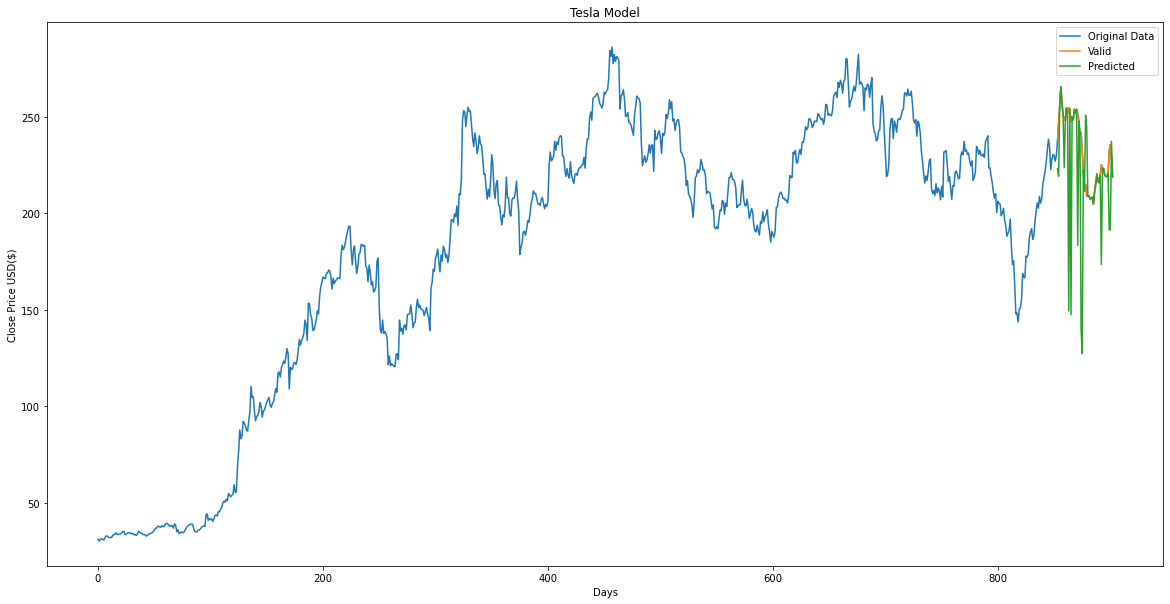

In [25]:
prediction= treePrediction
valid= df[X.shape[0]:]
valid['Predictions']= prediction
plt.figure(figsize=(20,10))
plt.title("Tesla Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original Data','Valid','Predicted'])

Linear Regression

C:\Users\SHRIPADA\AppData\Local\Temp/ipykernel_6948/756920657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= prediction


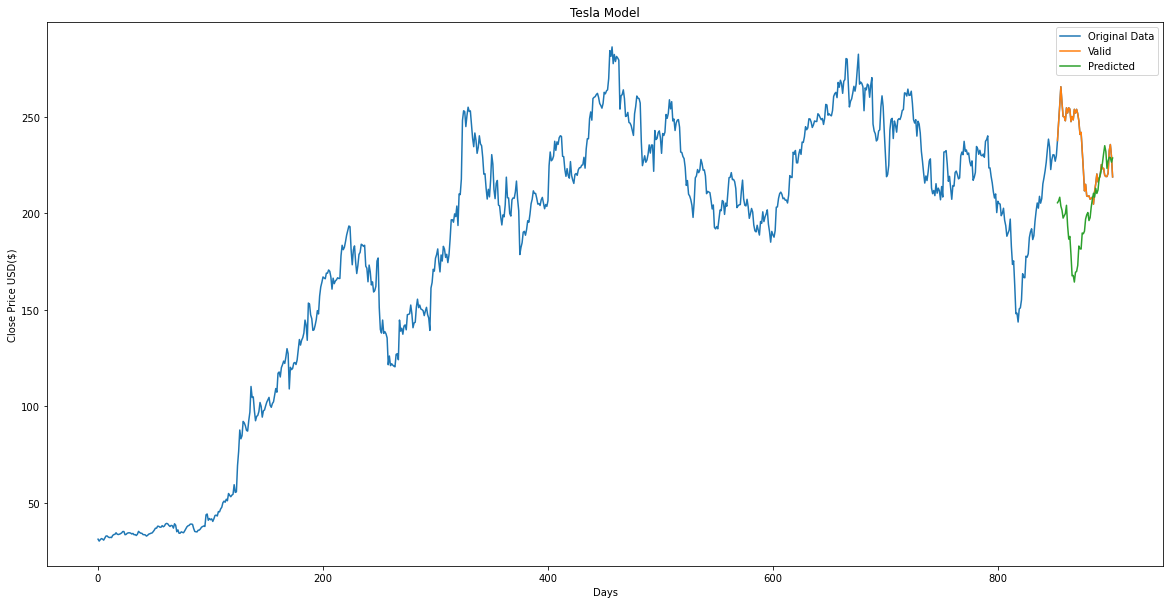

In [26]:
prediction= lrPrediction
valid= df[X.shape[0]:]
valid['Predictions']= prediction
plt.figure(figsize=(20,10))
plt.title("Tesla Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original Data','Valid','Predicted'])